In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [2]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)

In [7]:
data.head(n=5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [9]:
data.dtypes

country        object
year            int64
pop           float64
continent    category
lifeExp       float64
gdpPercap     float64
dtype: object

In [8]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


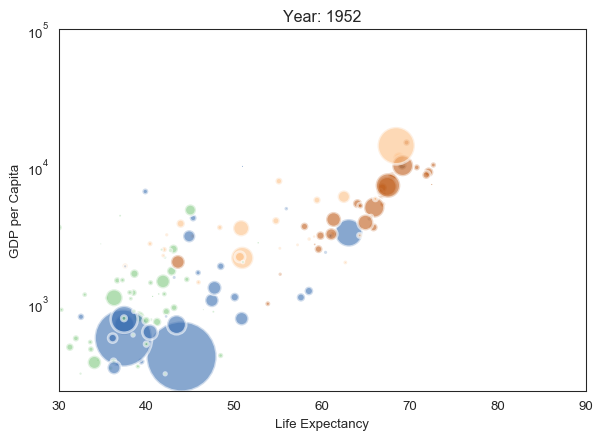

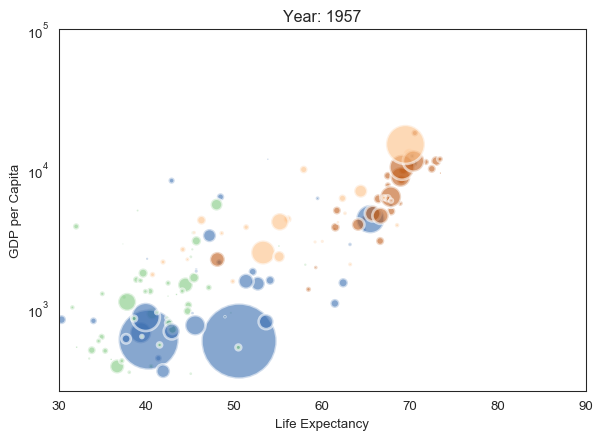

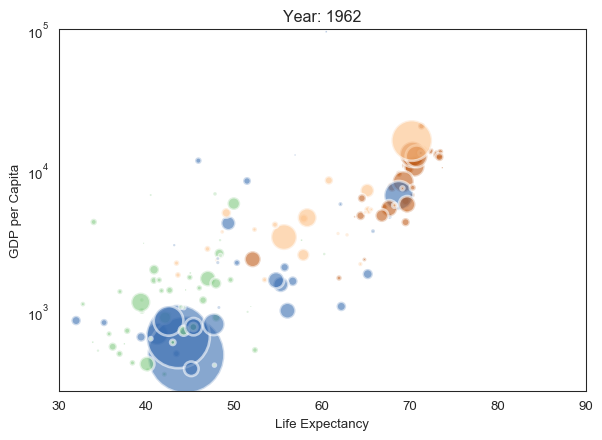

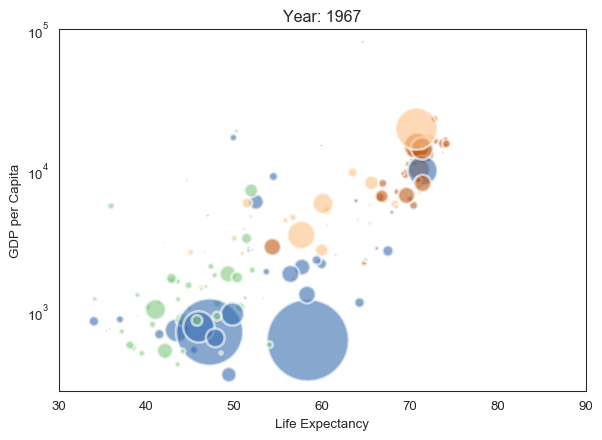

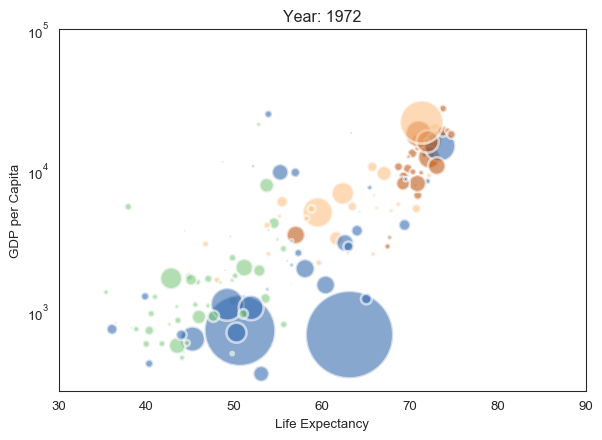

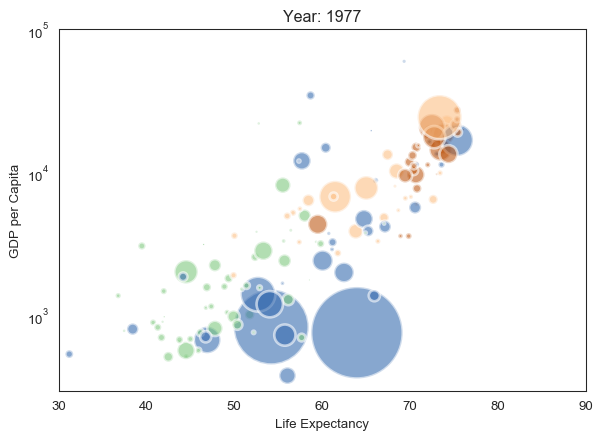

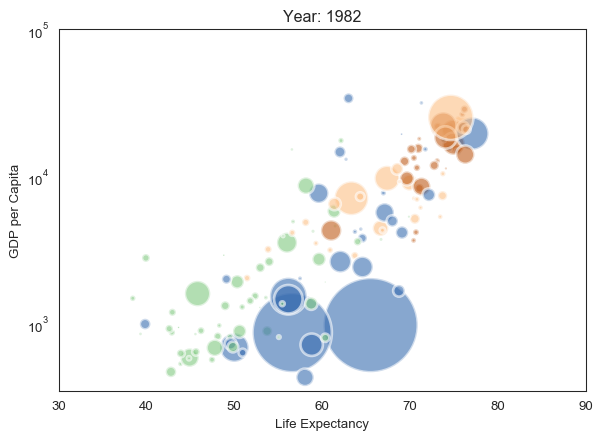

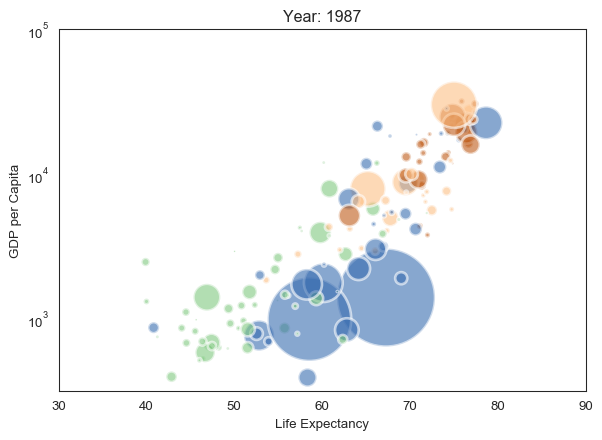

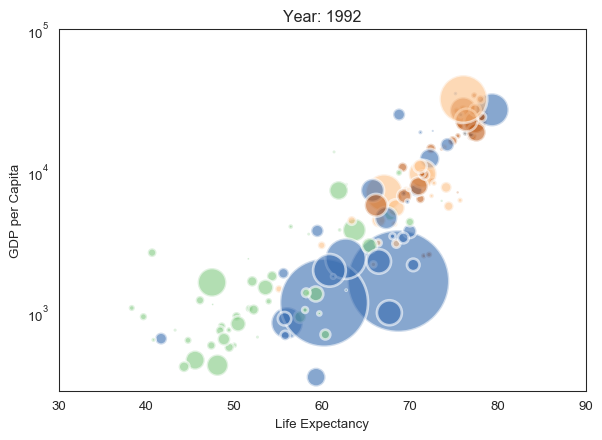

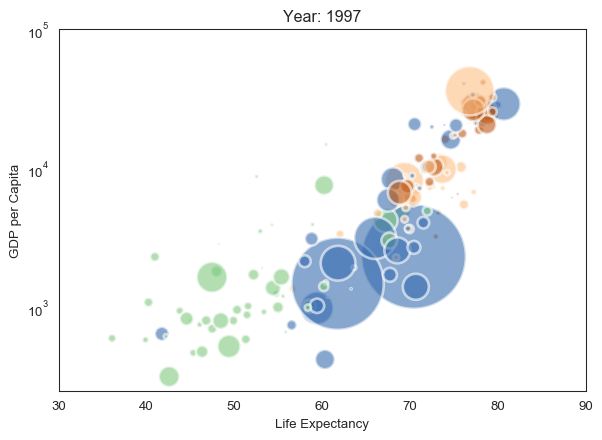

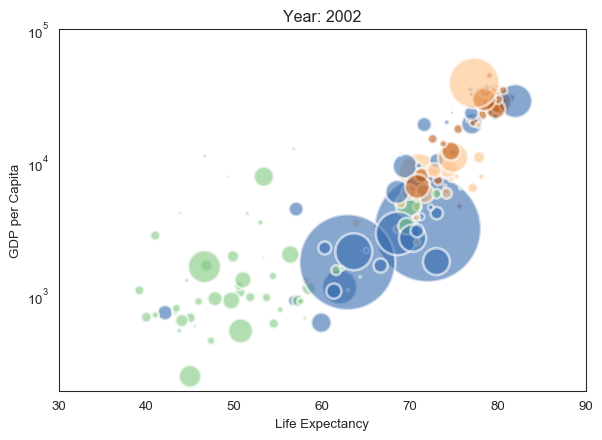

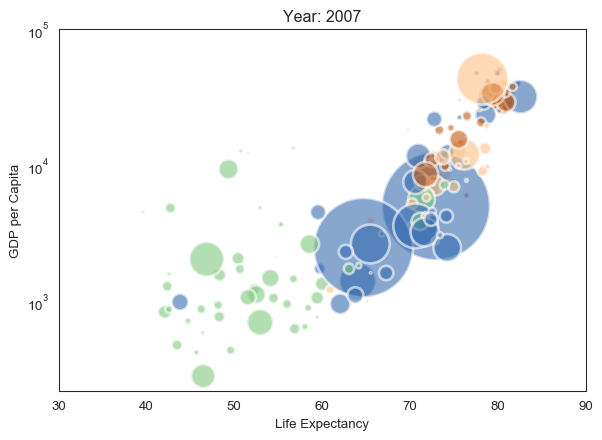

In [10]:
# For each year:
for i in data.year.unique():
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
    tmp=data[ data.year == i ]
    plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
 
    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)
    
    # Save it
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    # Then use image magick (this is bash, not python)
 #   convert -delay 80 Gapminder*.png animated_gapminder.gif